# Alcohal Time Restriction
trying some shits here \
mainly about internship

In [280]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## [จำนวนประชากรอายุ 15 ปีขึ้นไป ที่มีพฤติกรรมการดื่มสุรา](https://data.go.th/dataset/os_07_00004)
- ถึง ปี 58 obsolete

In [281]:
# 2547 - 2558 too obsolete
legit_pop_raw = pd.read_csv('https://apis1.nso.go.th/data?table=OS_07_0004_01&format=csv') 
df = legit_pop_raw.pivot_table(values='value', index= 'year').reset_index()
df
# legit_pop_raw

,year,value
0,2547,7.669309e+06
1,2550,1.705562e+07
2,2554,6.399207e+06
3,2557,6.531672e+06
4,2558,6.140865e+06


<Axes: xlabel='year', ylabel='value'>

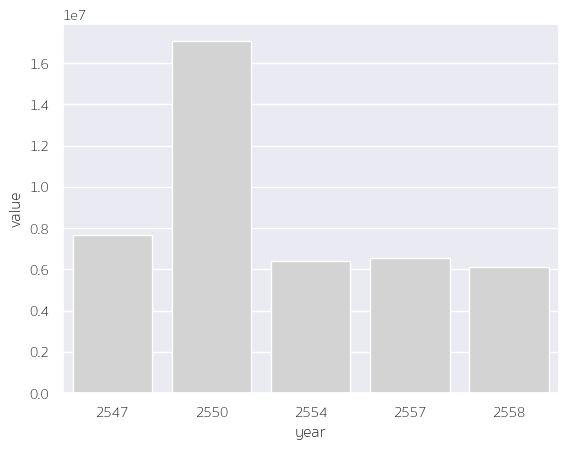

In [282]:
sns.barplot(data = df, x='year', y = 'value', color='lightgray')

## [ความชุกของผู้บริโภคเครื่องดื่มแอลกอฮอล์ในประชากรอายุ 15 ปีขึ้นไป](https://catalog.nso.go.th/dataset/os_05_00007)
- ล่าสุดเท่าที่จะหาได้แล้ว
- อัตราความชุกของนักดื่มปัจจุบัน (Prevalence of current drinkers): ร้อยละของผู้ดื่มสุราอย่างน้อย หนึ่งหน่วยดื่มมาตรฐาน (ประมาณ 10 กรัมแอลกอฮอล์โดยน้าหนัก) ในรอบ 12 เดือนก่อนการสารวจแต่ ละครั้ง ในประชากรไทยอายุ 15 ปีขึ้นไปทั่วประเทศ

In [283]:
prevalence_raw = pd.read_csv("https://apis1.nso.go.th/data?table=OS_05_0007_01&format=csv")
prev_pivot = prevalence_raw.loc[prevalence_raw['sex'] == 'รวม']
prev_pivot

,year,sex,value,unit,source
0,2547,รวม,32.7,ร้อยละ,สำนักงานสถิติแห่งชาติ
1,2549,รวม,31.5,ร้อยละ,สำนักงานสถิติแห่งชาติ
2,2550,รวม,30.0,ร้อยละ,สำนักงานสถิติแห่งชาติ
3,2552,รวม,32.0,ร้อยละ,สำนักงานสถิติแห่งชาติ
4,2554,รวม,31.5,ร้อยละ,สำนักงานสถิติแห่งชาติ
5,2557,รวม,32.3,ร้อยละ,สำนักงานสถิติแห่งชาติ
6,2560,รวม,28.4,ร้อยละ,สำนักงานสถิติแห่งชาติ


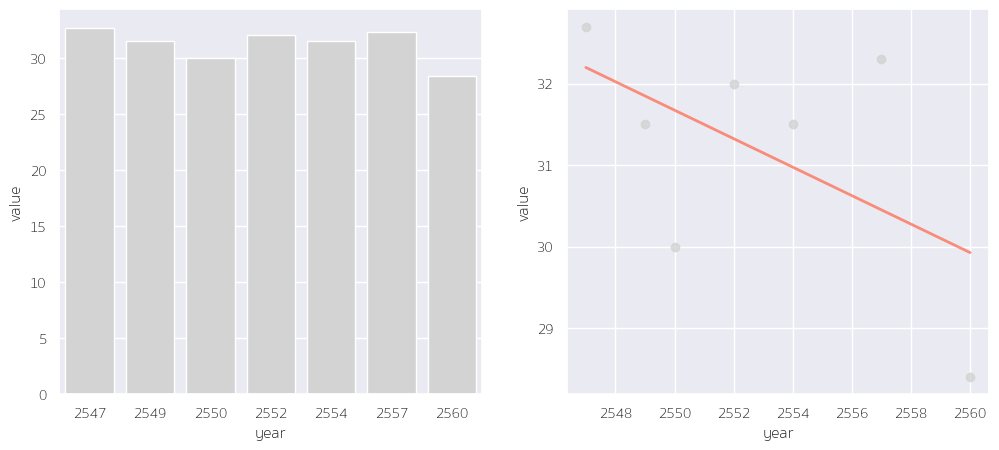

In [284]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=prev_pivot, x = 'year', y='value', color='lightgray', ax = axes[0]);
sns.regplot(data=prev_pivot, x = 'year', y='value', color='lightgray', scatter=True, ci=None , line_kws={"color":"tomato","alpha":0.7,"lw":2} , ax = axes[1]);

## [อัตราการดื่มสุราของประชากรอายุ 15-24 ปี](https://catalog.nso.go.th/dataset/os_05_00006/resource/0d3dfa07-6969-4a71-8e67-a706f574206e)

In [285]:
import matplotlib.pyplot as plt

preva2_raw = pd.read_csv("https://apis1.nso.go.th/data?table=OS_05_0006_01&format=csv")
preva2_raw

,year,value,unit,source
0,2544,21.6,ร้อยละ,สำนักงานสถิติแห่งชาติ
1,2547,23.5,ร้อยละ,สำนักงานสถิติแห่งชาติ
2,2549,23.7,ร้อยละ,สำนักงานสถิติแห่งชาติ
3,2550,21.9,ร้อยละ,สำนักงานสถิติแห่งชาติ
4,2552,24.2,ร้อยละ,สำนักงานสถิติแห่งชาติ
5,2554,23.7,ร้อยละ,สำนักงานสถิติแห่งชาติ
6,2557,25.2,ร้อยละ,สำนักงานสถิติแห่งชาติ
7,2560,23.9,ร้อยละ,สำนักงานสถิติแห่งชาติ


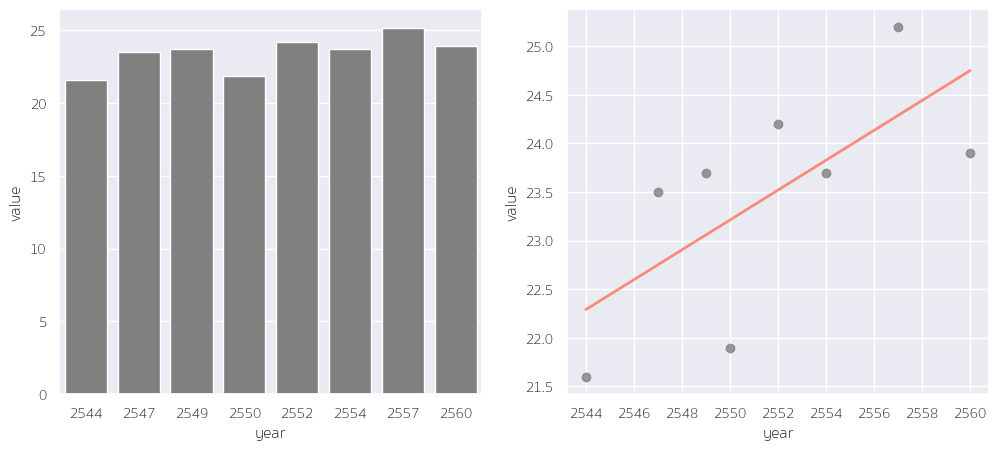

In [286]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(data = preva2_raw, x = 'year', y = 'value', color='gray', ax=axes[0]);
sns.regplot(x='year', y='value', data=preva2_raw, scatter=True, ci=None, color='gray', line_kws={"color":"tomato","alpha":0.7,"lw":2}, ax = axes[1]);

## [ความชุกการดื่มสุราแยกตามอายุ](https://alcoholstudy.in.th/index.php?ct=report_drinker&proc=main&year1=2564&year2=7&chart_id=4)

In [287]:
by_age = pd.read_csv('./files/ความชุกการดื่มสุราแยกตามอายุ.csv', skipfooter=1, encoding='utf-8')
by_age_melt = pd.melt(by_age, id_vars=['ช่วงอายุ'], var_name='ปี', value_name='ความชุก')
by_age_revise = by_age_melt[by_age_melt['ช่วงอายุ'] != 'ผู้ดื่มใน 12 เดือนที่ผ่านมา']

by_age_revise.head

/var/folders/0_/b7_gb01d3b5656shdfbkv9sc0000gn/T/ipykernel_8098/1173357921.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  by_age = pd.read_csv('./files/ความชุกการดื่มสุราแยกตามอายุ.csv', skipfooter=1, encoding='utf-8')


<bound method NDFrame.head of             ช่วงอายุ    ปี  ความชุก
1      อายุ 15-19 ปี  2544    11.04
2      อายุ 20-44 ปี  2544    38.10
3      อายุ 45-59 ปี  2544    38.10
4   อายุ 60 ปีขึ้นไป  2544    20.00
6      อายุ 15-19 ปี  2547    13.74
7      อายุ 20-44 ปี  2547    38.70
8      อายุ 45-59 ปี  2547    35.30
9   อายุ 60 ปีขึ้นไป  2547    19.30
11     อายุ 15-19 ปี  2550    12.74
12     อายุ 20-44 ปี  2550    34.90
13     อายุ 45-59 ปี  2550    32.00
14  อายุ 60 ปีขึ้นไป  2550    15.70
16     อายุ 15-19 ปี  2554    13.96
17     อายุ 20-44 ปี  2554    38.10
18     อายุ 45-59 ปี  2554    34.20
19  อายุ 60 ปีขึ้นไป  2554    16.60
21     อายุ 15-19 ปี  2557    14.60
22     อายุ 20-44 ปี  2557    39.80
23     อายุ 45-59 ปี  2557    34.40
24  อายุ 60 ปีขึ้นไป  2557    18.40
26     อายุ 15-19 ปี  2560    13.60
27     อายุ 20-44 ปี  2560    35.50
28     อายุ 45-59 ปี  2560    31.10
29  อายุ 60 ปีขึ้นไป  2560    15.20
31     อายุ 15-19 ปี  2564     8.97
32     อายุ 20-44 ปี  2564    35.5

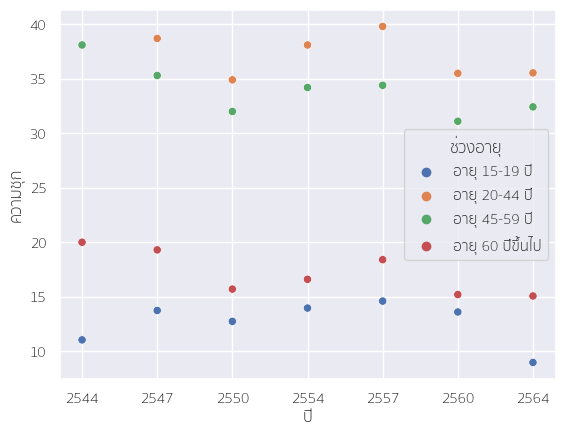

In [288]:
sns.set_theme(font='Sukhumvit Set')
sns.scatterplot(data = by_age_revise, x = 'ปี', y = 'ความชุก', hue='ช่วงอายุ');

In [289]:
behaviour = pd.read_excel('https://data.thaihealth.or.th/dataset/8bb23e8a-cc67-497f-8de7-2c0c8d86c963/resource/82da389c-028e-49ce-8715-a05fbe38aa44/download/-2564-.xlsx')
behaviour.head()

,ปี,ภาค,พฤติกรรมการขับขี่,เพศ,จำนวนผู้ดื่มสุรา,จำนวนที่สำรวจทั้งหมด,คิดเป็นร้อยละ
0,2564,ภาคเหนือ,ผู้ที่ดื่มสุราแล้วขับขี่ยานพาหนะ,ชาย,9177,229236,4.00
1,2564,ภาคเหนือ,ผู้ที่ดื่มสุราและขับขี่รถจักรยานยนต์โดยไม่สวมห...,ชาย,12909,229236,5.63
2,2564,ภาคเหนือ,ผู้ที่ดื่มสุราและขับรถยนต์โดยไม่คาดเข็มขัดนิรภัย,ชาย,2462,229236,1.07
3,2564,ภาคเหนือ,ผู้ที่ดื่มสุราและขับรถเร็ว ประมาท,ชาย,4140,229236,1.81
4,2564,ภาคเหนือ,ผู้ที่ดื่มสุราแล้วขับขี่ยานพาหนะ,หญิง,1405,55728,2.52


In [290]:
behav_pivot = pd.pivot_table(data = behaviour, index= 'พฤติกรรมการขับขี่', values=['จำนวนผู้ดื่มสุรา', 'จำนวนที่สำรวจทั้งหมด'])
behav_pivot['ร้อยละ'] = behav_pivot['จำนวนผู้ดื่มสุรา'] / behav_pivot['จำนวนผู้ดื่มสุรา']
behav_pivot

,จำนวนที่สำรวจทั้งหมด,จำนวนผู้ดื่มสุรา,ร้อยละ
พฤติกรรมการขับขี่,,,
ผู้ที่ดื่มสุราและขับขี่รถจักรยานยนต์โดยไม่สวมหมวกนิรภัย,77286.75,4223.875,1.0
ผู้ที่ดื่มสุราและขับรถยนต์โดยไม่คาดเข็มขัดนิรภัย,77286.75,777.125,1.0
ผู้ที่ดื่มสุราและขับรถเร็ว ประมาท,77286.75,1478.750,1.0
ผู้ที่ดื่มสุราแล้วขับขี่ยานพาหนะ,77286.75,4308.500,1.0


# Aging Soceity

## [เหตุผลของการย้านถิ่นฐาน ปี 2563 และ 2564](http://analytics.nso.go.th:9502/analytics/saw.dll?Dashboard)

In [311]:
reasons_63 = pd.read_csv('./files/เหตุผลของการย้ายถิ่น_63.csv')
reasons_63

,เหตุผลของการย้ายถิ่น,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้
0,หางานทำ,16097.9528,34475.2614,9882.4364,15859.3768,8642.4157
1,ต้องการเปลี่ยนงาน,2649.1310,15823.3966,5193.2681,6530.4592,2057.9812
2,ต้องการรายได้เพิ่มขึ้น,2017.7720,7800.8414,2879.3749,535.4164,197.4577
3,หน้าที่การงาน,4064.1963,26681.8189,10324.1255,2552.4254,7836.2372
4,ศึกษาต่อ,496.7646,3951.2398,3560.9938,2093.9644,2487.5726
5,ย้ายที่อยู่อาศัย,1566.8078,50845.7347,5821.7686,11727.4028,14672.6820
6,กลับภูมิลำเนา,1780.8734,13067.4049,23140.4857,53217.3862,25566.1880
7,ติดตามครอบครัว,2362.2619,28205.9062,15433.2577,19007.1854,16858.2089
8,ช่วยธุรกิจในครอบครัว,NaN,364.0510,1679.5621,1068.5782,123.0817
9,รักษาตัว,NaN,1873.9520,82.6234,1179.1530,780.0187


In [312]:
reasons_64 = pd.read_csv('./files/เหตุผลของการย้ายถิ่น_64.csv')
reasons_64

,เหตุผลของการย้ายถิ่น 2564,กรุงเทพมหานคร,กลาง,เหนือ,ตะวันออกเฉียงเหนือ,ใต้
0,กลับภูมิลำเนา,"2,031.69","15,369.01","31,706.07","78,988.26","24,152.27"
1,ติดตามครอบครัว,"4,628.05","33,976.30","24,395.65","27,694.31","27,996.21"
2,หางานทำ,"30,751.99","47,436.38","5,248.50","4,504.13","10,516.44"
3,ย้ายที่อยู่อาศัย,"1,312.48","44,906.28","9,912.05","19,393.41","16,995.47"
4,หน้าที่การงาน,"2,707.08","32,480.95","6,054.06","6,765.76","7,356.50"
5,ต้องการเปลี่ยนงาน,"1,730.33","15,663.86","5,649.38","4,948.58","2,168.14"
6,ศึกษาต่อ,"1,100.34","2,375.47","5,867.04","4,304.29","6,016.64"
7,ขาดคนดูแล,882.91,"4,102.48","2,747.11","2,846.64","3,853.35"
8,ช่วยธุรกิจในครอบครัว,"3,858.59","1,939.94","1,919.51",418.99,133.30
9,รักษาตัว,NaN,600.74,489.33,"4,791.63",376.90


## [สถิติการย้ายถิ่นฐาน](https://digi.data.go.th/showcase/migrating-in-thailand/)

In [291]:
migrate = pd.read_csv("./files/คนย้ายถิ่นฐาน.csv", encoding='utf-8')
migrate

,ภาค,ประเภท,หมวดอายุ,จำนวน,ปี,Date
0,กทม.,ผู้ย้ายถิ่น,0 - 14,4.493,2564,1/1/2564
1,กทม.,ผู้ย้ายถิ่น,15 - 19,0.567,2564,1/1/2564
2,กทม.,ผู้ย้ายถิ่น,20 - 24,11.009,2564,1/1/2564
3,กทม.,ผู้ย้ายถิ่น,25 - 29,8.903,2564,1/1/2564
4,กทม.,ผู้ย้ายถิ่น,30 - 34,5.332,2564,1/1/2564
...,...,...,...,...,...,...
220,กทม.,ผู้ไม่ย้ายถิ่น,60 ปีขึ้นไป,1279.403,2563,1/1/2563
221,ภาคกลาง,ผู้ไม่ย้ายถิ่น,60 ปีขึ้นไป,3351.517,2563,1/1/2563
222,ภาคเหนือ,ผู้ไม่ย้ายถิ่น,60 ปีขึ้นไป,2711.035,2563,1/1/2563
223,ภาคตะวันออกเฉียงเหนือ,ผู้ไม่ย้ายถิ่น,60 ปีขึ้นไป,3986.372,2563,1/1/2563


In [292]:
migrate['ปี'].astype(str)

0      2564
1      2564
2      2564
3      2564
4      2564
       ... 
220    2563
221    2563
222    2563
223    2563
224    2563
Name: ปี, Length: 225, dtype: object

In [293]:
migrate_pivot = migrate[migrate['ประเภท'] == 'ผู้ย้ายถิ่น'].pivot_table(values='จำนวน', index=['หมวดอายุ', 'ปี'])
migrate_pivot.reset_index(inplace=True)

In [294]:
migrate_pivot

,หมวดอายุ,ปี,จำนวน
0,0 - 14,2563,26.1788
1,0 - 14,2564,14.0916
2,15 - 19,2563,17.4122
3,15 - 19,2564,11.2366
4,20 - 24,2563,46.9510
5,20 - 24,2564,28.3070
6,25 - 29,2563,33.2456
7,25 - 29,2564,23.0938
8,30 - 34,2563,24.6728
9,30 - 34,2564,16.5828


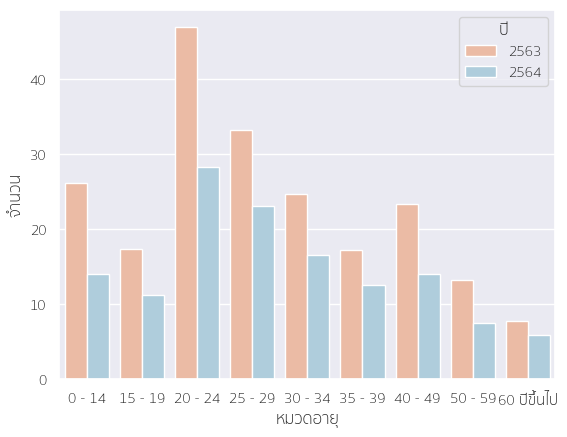

In [295]:
sns.set_theme(font='Sukhumvit Set')
sns.barplot(data = migrate_pivot, x = 'หมวดอายุ' , y = 'จำนวน', hue='ปี', palette='RdBu');

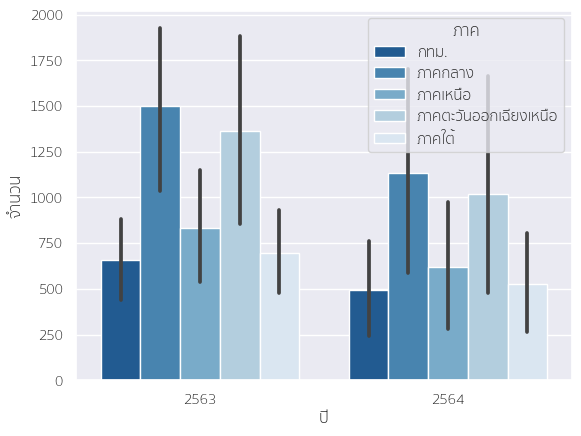

In [296]:
sns.barplot(data = migrate, x = 'ปี', y = 'จำนวน', hue='ภาค', palette='Blues_r');

## [จำนวนผู้สูงอายุจากการสำรวจ จำแนกตามลักษณะการอยู่อาศัย กลุ่มอายุ เพศ](https://catalog.nso.go.th/dataset/os_01_00045/resource/c7b3b266-a884-47e1-b042-5d8eccce7d69)

In [297]:
elders = pd.read_csv("https://catalogapi.nso.go.th/api/index?table=OS_01_0045_15&format=csv", encoding='utf-8')
elders.head(20)

,year,sex,age_group,type_of_con_mat,value,unit,source
0,2550,รวม,รวม,รวม,7020959,คน,สำนักงานสถิติแห่งชาติ
1,2550,รวม,60-69 ปี,รวม,4125253,คน,สำนักงานสถิติแห่งชาติ
2,2550,รวม,70-79 ปี,รวม,2226712,คน,สำนักงานสถิติแห่งชาติ
3,2550,รวม,80 ปีขึ้นไป,รวม,668994,คน,สำนักงานสถิติแห่งชาติ
4,2550,ชาย,รวม,รวม,3130736,คน,สำนักงานสถิติแห่งชาติ
5,2550,ชาย,60-69 ปี,รวม,1910507,คน,สำนักงานสถิติแห่งชาติ
6,2550,ชาย,70-79 ปี,รวม,962209,คน,สำนักงานสถิติแห่งชาติ
7,2550,ชาย,80 ปีขึ้นไป,รวม,258021,คน,สำนักงานสถิติแห่งชาติ
8,2550,หญิง,รวม,รวม,3890223,คน,สำนักงานสถิติแห่งชาติ
9,2550,หญิง,60-69 ปี,รวม,2214746,คน,สำนักงานสถิติแห่งชาติ


In [298]:
elders_pivot = elders[elders['type_of_con_mat'] != 'รวม'].pivot_table(index = 'type_of_con_mat',columns= 'year', values = 'value')
elders_pivot

year,2550,2557,2560,2564
type_of_con_mat,,,,
อยู่คนเดียว,1.793349e+05,2.919993e+05,407817.0,1067610.0
อยู่หลายคน,2.160985e+06,3.046236e+06,407817.0,7838224.0


In [299]:
selected = elders[(elders['type_of_con_mat'] == 'อยู่คนเดียว') & (elders['age_group'] != 'รวม')]
selected

,year,sex,age_group,type_of_con_mat,value,unit,source
13,2550,รวม,60-69 ปี,อยู่คนเดียว,256415,คน,สำนักงานสถิติแห่งชาติ
14,2550,รวม,70-79 ปี,อยู่คนเดียว,213828,คน,สำนักงานสถิติแห่งชาติ
15,2550,รวม,80 ปีขึ้นไป,อยู่คนเดียว,67762,คน,สำนักงานสถิติแห่งชาติ
17,2550,ชาย,60-69 ปี,อยู่คนเดียว,87756,คน,สำนักงานสถิติแห่งชาติ
18,2550,ชาย,70-79 ปี,อยู่คนเดียว,81477,คน,สำนักงานสถิติแห่งชาติ
19,2550,ชาย,80 ปีขึ้นไป,อยู่คนเดียว,21001,คน,สำนักงานสถิติแห่งชาติ
21,2550,หญิง,60-69 ปี,อยู่คนเดียว,168659,คน,สำนักงานสถิติแห่งชาติ
22,2550,หญิง,70-79 ปี,อยู่คนเดียว,132351,คน,สำนักงานสถิติแห่งชาติ
23,2550,หญิง,80 ปีขึ้นไป,อยู่คนเดียว,46761,คน,สำนักงานสถิติแห่งชาติ
49,2557,รวม,60-69 ปี,อยู่คนเดียว,431450,คน,สำนักงานสถิติแห่งชาติ


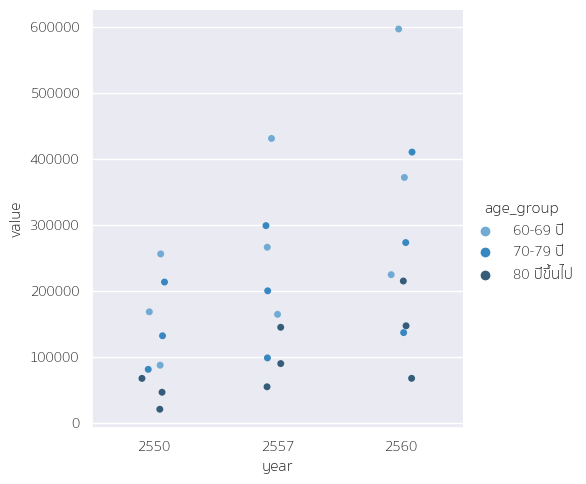

In [301]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set_theme(font='Sukhumvit Set')
g = sns.catplot(selected, x = 'year', hue = 'age_group', y = 'value', palette='Blues_d')
# g.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1e6:,.1f}m"))

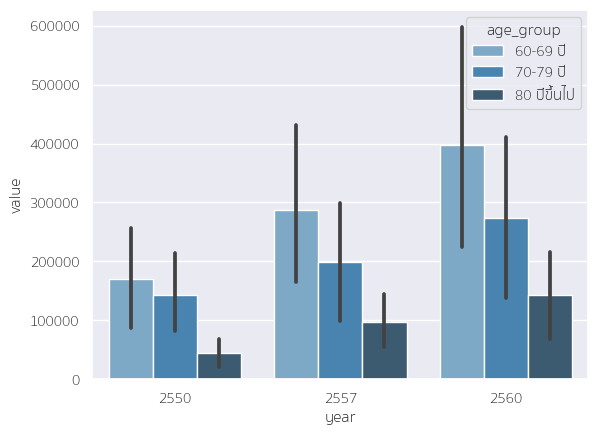

In [302]:
sns.set_theme(font='Sukhumvit Set')
g = sns.barplot(selected, x = 'year', hue = 'age_group', y = 'value', palette='Blues_d')

## [ร้อยละของครัวเรือน จำแนกตามระดับการศึกษาสูงสุดที่เรียนจบของหัวหน้า สถานะทางเศรษฐสังคมของครัวเรือน](https://catalog.nso.go.th/dataset/os_08_00001/resource/7c9e6896-67e4-4db6-955c-c1c24cf6268e)
- อาจเอาออกเพราะการเป็นหัวหน้าครอบครัว ไม่ได้บ่งบอกว่าจะย้ายถิ่นฐาน ไม่ได้เชื่มโยงกัน

In [303]:
# head_fam = pd.read_csv("https://catalogapi.nso.go.th/api/index?table=SES_OS_09&format=csv")
# head_fam.head(20)

## [จำนวนประชากรอายุ 60 ปีขึ้นไป จากการสำรวจ จำแนกตามระดับการศึกษาสูงสุดที่เรียนจบ เพศ](https://catalog.nso.go.th/dataset/os_01_00045/resource/33b9f8d4-83da-4ead-9f41-a0e45ac0f7c8)

In [ ]:
above_sixty = pd.read_csv('https://catalogapi.nso.go.th/api/index?table=OS_01_0045_09&format=csv')
above_sixty.head(50)

,year,region,area,level_of_edu,sex,value,unit,source
0,2545,ภาคเหนือ,รวม,ไม่ทราบ,รวม,863.0,คน,สำนักงานสถิติแห่งชาติ
1,2545,ภาคตะวันออกเฉียงเหนือ,รวม,ไม่ทราบ,รวม,1326.0,คน,สำนักงานสถิติแห่งชาติ
2,2545,ภาคใต้,รวม,ไม่ทราบ,รวม,1421.0,คน,สำนักงานสถิติแห่งชาติ
3,2545,ทั่วประเทศ,รวม,ไม่มีการศึกษา,ชาย,365337.0,คน,สำนักงานสถิติแห่งชาติ
4,2545,ทั่วประเทศ,ในเขตเทศบาล,ไม่มีการศึกษา,ชาย,89750.0,คน,สำนักงานสถิติแห่งชาติ
5,2545,ทั่วประเทศ,นอกเขตเทศบาล,ไม่มีการศึกษา,ชาย,275587.0,คน,สำนักงานสถิติแห่งชาติ
6,2545,กรุงเทพมหานคร,ในเขตเทศบาล,ไม่มีการศึกษา,ชาย,30831.0,คน,สำนักงานสถิติแห่งชาติ
7,2545,ภาคกลาง(ไม่รวมกรุงเทพมหานคร),รวม,ไม่มีการศึกษา,ชาย,67400.0,คน,สำนักงานสถิติแห่งชาติ
8,2545,ภาคเหนือ,รวม,ไม่มีการศึกษา,ชาย,129044.0,คน,สำนักงานสถิติแห่งชาติ
9,2545,ภาคตะวันออกเฉียงเหนือ,รวม,ไม่มีการศึกษา,ชาย,61393.0,คน,สำนักงานสถิติแห่งชาติ


## [อัตราเจริญพันธุ์รวมจากการสำรวจ](https://catalog.nso.go.th/dataset/os_01_00038/resource/bdd726a6-6c30-4081-b4d1-cbd5a45457dd)

In [ ]:
fertility = pd.read_csv('https://catalogapi.nso.go.th/api/index?table=OS_01_0038_01&format=csv')
fertility

,year,value,unit,source
0,2517-2519,4.90,คนต่อสตรีวัยเจริญพันธุ์ (15-49 ปี) หนึ่งคน,สำนักงานสถิติแห่งชาติ
1,2528-2529,2.70,คนต่อสตรีวัยเจริญพันธุ์ (15-49 ปี) หนึ่งคน,สำนักงานสถิติแห่งชาติ
2,2538-2539,2.00,คนต่อสตรีวัยเจริญพันธุ์ (15-49 ปี) หนึ่งคน,สำนักงานสถิติแห่งชาติ
3,2548-2549,1.50,คนต่อสตรีวัยเจริญพันธุ์ (15-49 ปี) หนึ่งคน,สำนักงานสถิติแห่งชาติ
4,2558-2559,1.61,คนต่อสตรีวัยเจริญพันธุ์ (15-49 ปี) หนึ่งคน,สำนักงานสถิติแห่งชาติ
